#Лабораторная работа №4. ОБУЧЕНИЕ С УЧИТЕЛЕМ. ЗАДАЧА КЛАССИФИКАЦИИ.<BR>

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn. preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metric
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from math import sqrt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?


In [2]:
data = pd.DataFrame([
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
])
data.columns=["weather","walk"]
data

,weather,walk
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [3]:
walk_probably = len(data.loc[(data['weather'] == 'дождь') & (data['walk'] == True)]) / len(data.loc[data['weather'] == 'дождь'])
print(walk_probably)

0.3333333333333333


## Задание 2

предобработка

In [4]:
data=pd.read_csv("weatherAUS.csv")
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


смотрим общую инфу о датасете

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
missing_values = data.isnull().sum()
missing_values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Обрабатываем пропущенные значения, заполняя целочисленные пропуски медианной, вещественные-целым значением другие-средним значением

In [7]:
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column] = data[column].fillna(data[column].mean())
    elif data[column].dtype == 'float64':
        data[column] = data[column].fillna(data[column].median())
    else:
        data[column] = data[column].fillna(data[column].mode()[0])

In [8]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Поменяем названия столбиков



In [9]:
data = data.rename (
    columns = {
        'Date' : 'date',
        'Location' : 'location',
        'MinTemp' : 'min_temp',
        'MaxTemp' : 'max_temp',
        'Rainfall' : 'rainfall',
        'Evaporation' : 'evaporation',
        'Sunshine' : 'sunshine',
        'WindGustDir' : 'wind_gust_dir',
        'WindGustSpeed' : 'wind_gust_speed',
        'WindDir9am' : 'wind_dir_9am',
        'WindDir3pm' : 'wind_dir_3pm',
        'WindSpeed9am' : 'wind_speed_9am',
        'WindSpeed3pm' : 'wind_speed_3pm',
        'Humidity9am' : 'humidity_9am',
        'Humidity3pm' : 'humidity_3pm',
        'Pressure9am' : 'pressure_9am',
        'Pressure3pm' : 'pressure_3pm',
        'Cloud9am' : 'cloud_9am',
        'Cloud3pm' : 'cloud_3pm',
        'Temp9am' : 'temp_9am',
        'Temp3pm' : 'temp_3pm',
        'RainToday' : 'rain_today',
        'RainTomorrow' : 'rain_tomorrow'
    }
)

In [10]:
data.columns

Index(['date', 'location', 'min_temp', 'max_temp', 'rainfall', 'evaporation',
       'sunshine', 'wind_gust_dir', 'wind_gust_speed', 'wind_dir_9am',
       'wind_dir_3pm', 'wind_speed_9am', 'wind_speed_3pm', 'humidity_9am',
       'humidity_3pm', 'pressure_9am', 'pressure_3pm', 'cloud_9am',
       'cloud_3pm', 'temp_9am', 'temp_3pm', 'rain_today', 'rain_tomorrow'],
      dtype='object')

удаляем дубликаты

In [11]:
data.duplicated().sum()

np.int64(0)

Преобразовываем данные в числовые

In [12]:
data['location'] = pd.Categorical(data['location']).codes
data['wind_gust_dir'] = pd.Categorical(data['wind_gust_dir']).codes
data['wind_dir_9am'] = pd.Categorical(data['wind_dir_9am']).codes
data['wind_dir_3pm'] = pd.Categorical(data['wind_dir_3pm']).codes
data['rain_today'] = pd.Categorical(data['rain_today']).codes
data['rain_tomorrow'] = pd.Categorical(data['rain_tomorrow']).codes
data

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,2017-06-24,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


разделаем дату на день месяц и год, что мб полезным для дальнейшего анализа

In [13]:
data ['date'] = pd.to_datetime(data['date'],format = '%Y-%m-%d')
data['date_day'] = data['date'].dt.day
data['date_month'] = data['date'].dt.month
data['date_year'] = data['date'].dt.year
data = data.drop(["date"], axis=1)
data

,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,wind_dir_3pm,...,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow,date_day,date_month,date_year
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,1,12,2008
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2,12,2008
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,3,12,2008
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,4,12,2008
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,...,1020.3,5.0,5.0,10.1,22.4,0,0,21,6,2017
145456,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,...,1019.1,5.0,5.0,10.9,24.5,0,0,22,6,2017
145457,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,...,1016.8,5.0,5.0,12.5,26.1,0,0,23,6,2017
145458,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


Выделяем целевой признак и предикторы

In [14]:
y = data["rain_tomorrow"]
X = data.drop(["rain_tomorrow"], axis=1)

Масштабируем числовые признаки.


In [15]:
normalizer = StandardScaler()
X_normalized_zscore = normalizer.fit_transform(X)

стандартизируем данные так, чтобы каждый признак имел:
- Среднее значение равное 0.
- Стандартное отклонение равное 1.

смотрим на дисбаланс:

In [16]:
X_normalized_zscore[y==0].shape

(113583, 24)

In [17]:
X_normalized_zscore[y==1].shape

(31877, 24)

необходима балансировка

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
balans = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_resampled, y_resampled = balans.fit_resample(X_normalized_zscore, y)

X_resampled[y_resampled==0].shape

(31877, 24)

Разбиваем данные на обучающую и тестовую выборки

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)


## KNN метод

Создаются четыре классификатора KNN с различными значениями соседей дя выбора гиперпараметров и оптимального значения

In [20]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn100 = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=2)
knn1000 = KNeighborsClassifier(n_neighbors=1000, metric='minkowski', p=2)
knn10000 = KNeighborsClassifier(n_neighbors=10000, metric='minkowski', p=2)

обучаем

In [21]:
knn10.fit(X_train,y_train)
knn100.fit(X_train,y_train)
knn1000.fit(X_train,y_train)
knn10000.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10000)

Расчитываем точность используя метрику accuracy

In [22]:
y_bin_knn_pred10 = knn10.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred10)

0.7701356756332837

In [23]:
y_bin_knn_pred100 = knn100.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred100)

0.7788408752254725

In [24]:
y_bin_knn_pred1000 = knn1000.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred1000)

0.7651948866755549

In [25]:
y_bin_knn_pred10000 = knn10000.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred10000)

0.7525684260058034

Видим,что хромает точность если кол-во соседей выше 100

смотрим другие метрики:precision,recall,F1-мера

In [26]:
print(classification_report(y_test, y_bin_knn_pred10))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      6241
           1       0.81      0.72      0.76      6510

    accuracy                           0.77     12751
   macro avg       0.77      0.77      0.77     12751
weighted avg       0.77      0.77      0.77     12751



In [27]:
print(classification_report(y_test, y_bin_knn_pred100))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      6241
           1       0.80      0.75      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751



Не забываем про ROC AUC score

0.7711704670393569


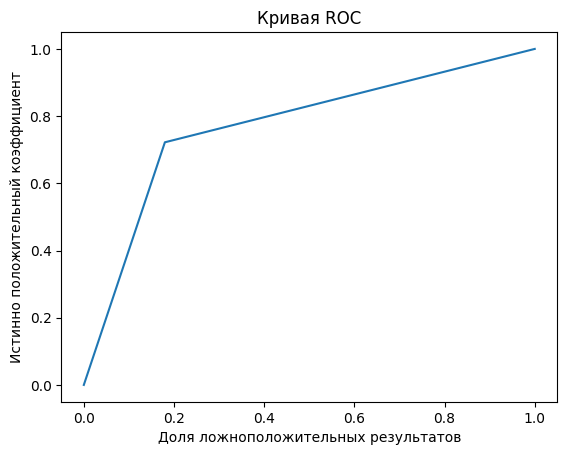

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(roc_auc_score(y_test, y_bin_knn_pred10))

fpr, tpr, plot = roc_curve(y_test, y_bin_knn_pred10)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

0.7794806333716559


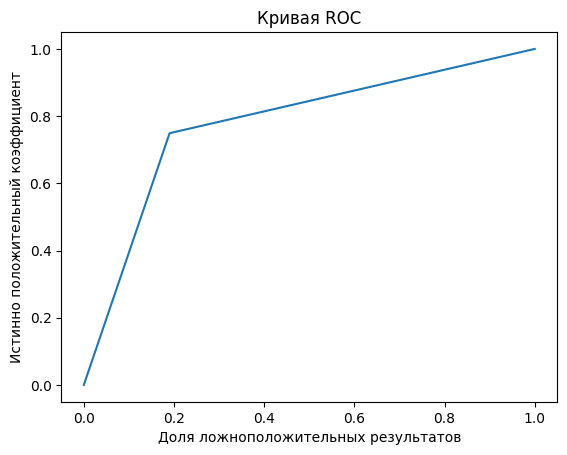

In [29]:
print(roc_auc_score(y_test, y_bin_knn_pred100))

fpr, tpr, plot = roc_curve(y_test, y_bin_knn_pred100)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

## Naive Bayes

In [30]:
gauss_bayes = GaussianNB()
gauss_bayes.fit(X_train, y_train)

y_pred = gauss_bayes.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.7504509450239197

In [32]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6241
           1       0.79      0.70      0.74      6510

    accuracy                           0.75     12751
   macro avg       0.75      0.75      0.75     12751
weighted avg       0.75      0.75      0.75     12751



np.float64(0.751508420974129)

0.751508420974129


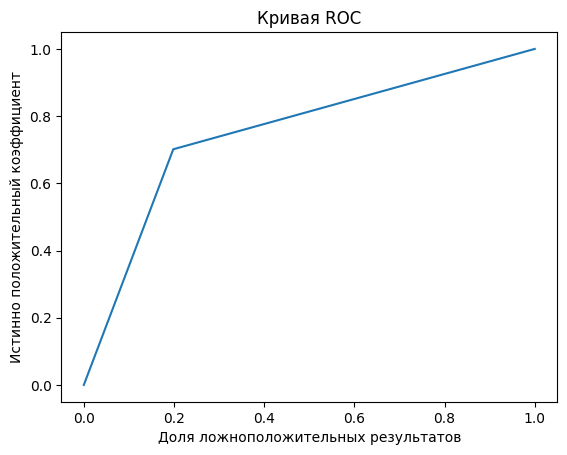

In [33]:
print(roc_auc_score(y_test, y_pred))

fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

## Logistic Regression

Ищем гипермараметр для лог регрессии с использованием метода поиска по сетке

In [34]:
gridsearch = GridSearchCV(LogisticRegression(solver="newton-cholesky", max_iter=500), {"C": np.arange(0.1, 1.1, 0.1)}, scoring="f1")
gridsearch.fit(X_train, y_train).best_params_

{'C': np.float64(0.9)}

Подобрали гиперпараметр , обучаем

In [35]:
logreg = LogisticRegression(C=0.2)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [36]:
accuracy_score(y_test,  y_pred)

0.7809583562073563

In [37]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751



np.float64(0.7813259449982783)

0.7813259449982783


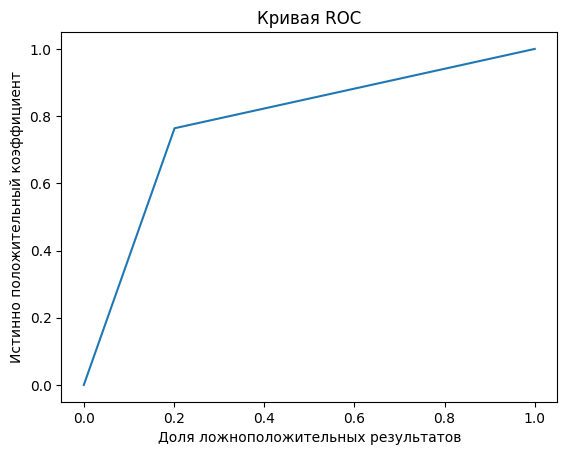

In [38]:
print(roc_auc_score(y_test, y_pred))

fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

## SVM

Для метода опорных векторов используем параметры по умолчанию, обучим предскажем и посомтим метрики, ну все по дефолтику

In [39]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7982119049486315

In [40]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6241
           1       0.81      0.79      0.80      6510

    accuracy                           0.80     12751
   macro avg       0.80      0.80      0.80     12751
weighted avg       0.80      0.80      0.80     12751



np.float64(0.7984117220964088)

0.7984117220964088


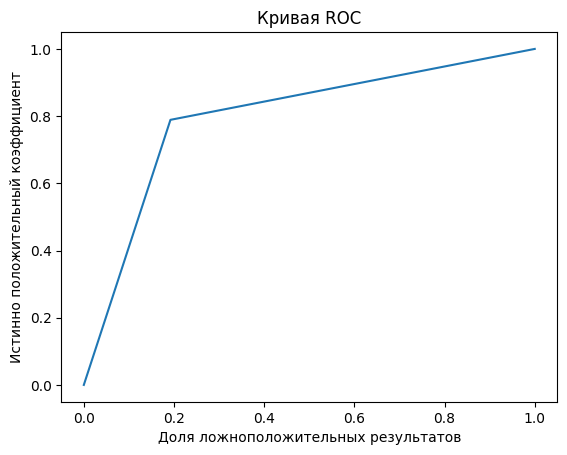

In [41]:
print(roc_auc_score(y_test, y_pred))

fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

## Итоговая модель классификаторов

Оцениваем несколько классификаторов на тестовой выборке.

In [43]:
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.2),
    'KNN classifier': knn100,
    'SVM': clf,
    'Naive Bayes' : GaussianNB()
}
n_classifiers = len(classifiers)

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred), "\n\n")

Logistic Regression
Accuracy (train) for Logistic Regression: 78.1% 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751
 


KNN classifier
Accuracy (train) for KNN classifier: 77.9% 
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      6241
           1       0.80      0.75      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751
 


SVM
Accuracy (train) for SVM: 79.8% 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6241
           1       0.81      0.79      0.80      6510

    accurac

## Задание 3

Импортируюем функции для визуализации и вычисления метрик классификации.

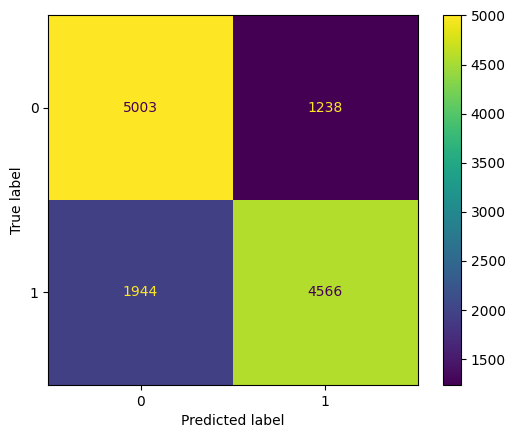

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred) #Cоздаем матрицу ошибок
ConfusionMatrixDisplay(cm).plot() #визуалиация
plt.show()

## Precision, Recall, F-мера

* $P$ – число истинных результатов, $P = TP + FN$
* $N$ – число ложных результатов, $N = TN + FP.$


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

Вычисляем точность (accuracy) модели на основе предсказаний и истинных меток.

In [46]:
def accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() # извлекаем значения из матрицы
    p=tp+fn
    n=tn+fp
    return (tp+tn)/(p+n)
print(accuracy_score(y_test, y_pred), accuracy(y_test, y_pred))

0.7504509450239197 0.7504509450239197


вычисляем точность (precision) предсказаний для положительного класса.

In [47]:
def precision(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return tp/(tp+fp)
print(precision_score(y_test, y_pred), precision(y_test, y_pred))

0.7866988283942109 0.7866988283942109


Вычисляем полноту (recall), для положительного класса.

In [49]:
def recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return tp/p
print(recall_score(y_test, y_pred), recall(y_test, y_pred))

0.7013824884792627 0.7013824884792627


Вычисляет метрику F1-score, которая является гармоническим средним между точностью (precision) и полнотою (recall).

In [50]:
def f1(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return 2/(1/precision(y_test, y_pred)+1/recall(y_test, y_pred))
print(f1_score(y_test, y_pred), f1(y_test, y_pred))

0.741594932597044 0.741594932597044


## KNN метод своими руками

In [51]:
# Расстояние Евклида между двумя точками
#вычисляет Евклидово расстояние между двумя точками в n-мерном пространстве.
#Она используется для измерения расстояния между новой точкой и обучающими данными.

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    # Устанавливаем параметры
    def __init__(self, k=3):
        self.k = k
    # Сохраняем обучающие данные 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    #Для каждого элемента x в X вызывается метод _predict, чтобы получить предсказание для отдельного элемента.
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        #Вычисляем расстояния от x до всех обучающих данных с помощью функции euclidean_distance.
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Сортируем расстояния и получаем индексы k ближайших соседей.
        k_indices = np.argsort(distances)[:self.k]
        # Метки классов k ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Подсчет самого частого класса
        counts = np.bincount(k_nearest_labels)
        most_common = np.argmax(counts)

        # Возвращаем самый частый класс
        return most_common

In [53]:
#создаём обучающую выборку
X_train2 = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0], [9, 11]]) #матрица признаков (каждая строка — это точка в двухмерном пространстве)
y_train2 = np.array([0, 0, 1, 1, 0, 1]) #метки классов для каждой из точек.

knn = KNN(k=3)
knn.fit(X_train2, y_train2)

X_test2 = np.array([[2, 3], [6, 9], [1, 1]])
y_test2 = np.array([0, 1, 1])
y_pred2 = knn.predict(X_test2)
print(y_pred2)

[0 1 0]
